***This work for both homework 3 and homework 4***

**the first part is homework 3 which starts here**

In [444]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

CS 522 Data Mining Programming Assignment

1. Which colors of the vehicles are more likely to get involved in a traffic violation?


From the dataset BLACK was the most color that get involved in a traffic violation


2. Which models of the car are more likely to get involved in a traffic viola- tion?

From the dataset 4S was the most model that get involved in a traffic violation

The data was from this link https://www.kaggle.com/rounak041993/traffic-violations-in-maryland-county



There was some missing information in the dataset, so I started by dropping all the missing values. Then I tried to see what was interesting about this data. The data was about Maryland Traffic Violations, so most violations were from MD. The second state was VA, then DC. SILVER SPRING was the highest city of Violations then GAITHERSBURG and ROCKVILLE respectively. 

When I was looking for the years, first, I had to change the format, then I realized many values were incorrect. However, most of the violations go to the owners of 2003 - 2007, and the largest go to what was made in 2006. 

In [445]:
Traffic_Violations = pd.read_csv('/content/drive/MyDrive/Data mining/Traffic_Violations.csv', low_memory= False)

In [446]:
Traffic_Violations.tail(8)


,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
1292391,12/14/2012,23:20:00,MCP,Headquarters and Special Operations,Stop Lights,MD 355/ PROFESSIONAL DR,39.162066,-77.224062,No,No,No,No,No,No,No,No,No,No,MD,05 - Light Duty Truck,2001.0,FORD,EXPLORER,WHITE,ESERO,64*,NaN,No,BLACK,M,HYATTSVILLE,MD,MD,B - Unmarked Patrol,"(39.1620661, -77.2240618666667)"
1292392,12/14/2012,23:33:00,MCP,Headquarters and Special Operations,Tag Lights,MVA/ RUSSELL AVE,39.154323,-77.209751,No,No,No,No,No,No,No,No,No,No,MD,05 - Light Duty Truck,2005.0,INFI,FX35,BLACK,ESERO,65*,NaN,No,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.1543231, -77.2097508333333)"
1292393,12/14/2012,23:42:00,MCP,Headquarters and Special Operations,Tag Lights,MVA/ MIDCOUNTY HWY,39.159728,-77.202206,No,No,No,No,No,No,No,No,No,No,MD,05 - Light Duty Truck,2009.0,MITS,GALANT,WHITE,ESERO,65*,NaN,No,BLACK,F,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1597281833333, -77.2022063666667)"
1292394,12/14/2012,23:56:00,MCP,Headquarters and Special Operations,Stop Lights,LOST KNOFE RD/ MVA,39.156846,-77.202903,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2007.0,TOYT,MATRIX,BLUE,ESERO,64*,NaN,No,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(39.1568459666667, -77.2029032166667)"
1292395,12/15/2012,00:11:00,MCP,Headquarters and Special Operations,Headlights,MIDCOUNTY HWY/ MILLER FALL DR,39.143137,-77.158675,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,1998.0,HOND,CIVIC,GREEN,ESERO,55*,NaN,No,HISPANIC,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1431373333333, -77.1586750333333)"
1292396,12/15/2012,00:30:00,MCP,Headquarters and Special Operations,Stop Lights,270/ MVA,39.152770,-77.220292,No,No,No,No,No,No,No,No,No,No,MD,05 - Light Duty Truck,2006.0,HOND,CRV,BLUE,ESERO,64*,NaN,No,WHITE,F,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1527700833333, -77.2202923833333)"
1292397,12/16/2012,22:55:00,MCP,Headquarters and Special Operations,Tag Lights,MD 97/ ASPEN HILL RD,39.080061,-77.074347,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2003.0,CHEV,CAVALIER,YELLOW,ESERO,65*,NaN,No,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0800610666667, -77.0743472)"
1292398,12/21/2012,23:47:00,MCP,Headquarters and Special Operations,Tag Lights,MD 193/ 495,39.017139,-77.006379,No,No,No,No,No,No,No,No,No,No,MD,05 - Light Duty Truck,2001.0,FORD,VAN,BLUE,ESERO,65*,NaN,No,BLACK,M,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.0171391166667, -77.0063790833333)"


In [447]:
Traffic_Violations[0:2]

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2008.0,FORD,4S,BLACK,Citation,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,No,No,No,No,No,No,No,No,VA,02 - Automobile,2001.0,TOYOTA,COROLLA,GREEN,Citation,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"


In [448]:
Traffic_Violations.shape

(1292399, 35)

In [449]:
Traffic_Violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292399 entries, 0 to 1292398
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1292399 non-null  object 
 1   Time Of Stop             1292399 non-null  object 
 2   Agency                   1292399 non-null  object 
 3   SubAgency                1292389 non-null  object 
 4   Description              1292390 non-null  object 
 5   Location                 1292397 non-null  object 
 6   Latitude                 1197045 non-null  float64
 7   Longitude                1197045 non-null  float64
 8   Accident                 1292399 non-null  object 
 9   Belts                    1292399 non-null  object 
 10  Personal Injury          1292399 non-null  object 
 11  Property Damage          1292399 non-null  object 
 12  Fatal                    1292399 non-null  object 
 13  Commercial License       1292399 non-null 

In [450]:
Traffic_Violations_2 = Traffic_Violations.dropna()

In [451]:
Traffic_Violations_2.shape

(1120327, 35)

In [452]:
Traffic_Violations_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120327 entries, 1 to 1291740
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1120327 non-null  object 
 1   Time Of Stop             1120327 non-null  object 
 2   Agency                   1120327 non-null  object 
 3   SubAgency                1120327 non-null  object 
 4   Description              1120327 non-null  object 
 5   Location                 1120327 non-null  object 
 6   Latitude                 1120327 non-null  float64
 7   Longitude                1120327 non-null  float64
 8   Accident                 1120327 non-null  object 
 9   Belts                    1120327 non-null  object 
 10  Personal Injury          1120327 non-null  object 
 11  Property Damage          1120327 non-null  object 
 12  Fatal                    1120327 non-null  object 
 13  Commercial License       1120327 non-null 

In [453]:
Traffic_Violations_2.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,No,No,No,No,No,No,No,No,VA,02 - Automobile,2001.0,TOYOTA,COROLLA,GREEN,Citation,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,Yes,No,No,No,No,No,No,MD,02 - Automobile,2001.0,HONDA,ACCORD,SILVER,Citation,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,Yes,No,No,No,No,No,No,MD,02 - Automobile,1998.0,DODG,DAKOTA,WHITE,Citation,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
6,10/08/2013,13:23:00,MCP,"4th district, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GEORGIA AVE / BEL PRE RD,39.093383,-77.079552,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,1993.0,FORD,PICKUP,BLACK,Citation,13-401(h),Transportation Article,No,HISPANIC,M,BELTSVILLE,MD,MD,A - Marked Patrol,"(39.0933833333333, -77.0795516666667)"
10,02/14/2014,20:10:00,MCP,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2005.0,CADI,STS,BLACK,Citation,21-311(1),Transportation Article,No,WHITE,M,POINT OF ROCK,MD,WV,A - Marked Patrol,"(39.2348434333333, -77.28153995)"


In [454]:
len(pd.unique(Traffic_Violations_2['Year']))

290

In [455]:


Traffic_Violations_2.Year = Traffic_Violations_2.Year.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [456]:
Traffic_Violations_2.Year.unique()

array([2001, 1998, 1993, 2005, 1996, 2004, 2002, 2009, 2000, 2003, 1991,
       2012, 2008, 2011, 2006, 2013, 2007, 1997, 1999, 1994, 2017, 2016,
       2014, 2010, 2015, 1995, 1990,    0, 3003, 1988, 1992,  128, 1985,
       1989, 1987, 1986, 1982, 2018, 1975, 2021, 1972, 1981, 1977, 1983,
       1976, 1973, 1984, 1980, 1197, 2103, 1974, 2022, 5338, 1007, 1900,
       2914, 1978, 2077, 1111, 4452, 2019, 2916, 2031, 2207,    6, 1958,
       1010, 2911, 1966, 3013, 1979, 1005, 2104, 1969, 2941, 1013, 9999,
       1970, 2500, 1012, 1965, 4200, 1017, 5300, 4046, 2992, 1776, 1729,
       2596, 5384, 2105, 2258, 8560, 2024, 1001, 6338, 1967, 5005, 5257,
       1299, 1971, 3574, 1953, 2917,  205, 2200, 1076, 1195, 1196, 1968,
       2773, 2915, 2912, 2051, 9035, 2998, 1199, 2088,   95, 1957, 5843,
       2997, 7575, 9624, 4313,    8, 5441, 1936, 4209, 3244, 1964, 2096,
       5772, 9510, 1186, 1015, 2919, 2066, 2202, 1879, 6838, 2025, 2044,
       3940, 2097,  277, 2102, 1006, 2050, 2201, 72

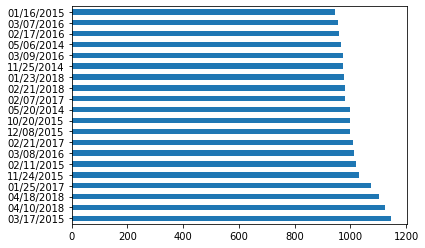

In [457]:
Traffic_Violations_2['Date Of Stop'].value_counts()[:20].plot(kind='barh')


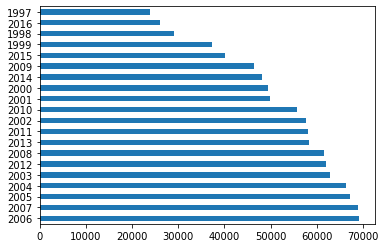

In [458]:
Traffic_Violations_2['Year'].value_counts()[:20].plot(kind='barh')

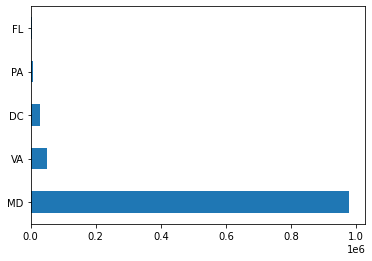

In [459]:
Traffic_Violations_2['State'].value_counts()[:5].plot(kind='barh')

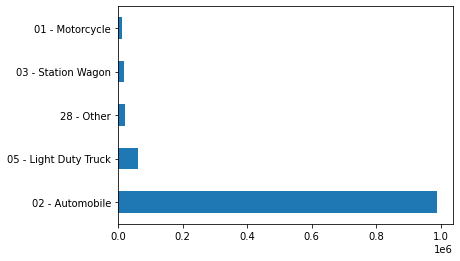

In [460]:
Traffic_Violations_2['VehicleType'].value_counts()[:5].plot(kind='barh')


In [461]:
Traffic_Violations_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120327 entries, 1 to 1291740
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1120327 non-null  object 
 1   Time Of Stop             1120327 non-null  object 
 2   Agency                   1120327 non-null  object 
 3   SubAgency                1120327 non-null  object 
 4   Description              1120327 non-null  object 
 5   Location                 1120327 non-null  object 
 6   Latitude                 1120327 non-null  float64
 7   Longitude                1120327 non-null  float64
 8   Accident                 1120327 non-null  object 
 9   Belts                    1120327 non-null  object 
 10  Personal Injury          1120327 non-null  object 
 11  Property Damage          1120327 non-null  object 
 12  Fatal                    1120327 non-null  object 
 13  Commercial License       1120327 non-null 

In [462]:
Traffic_Violations_2.Gender.unique()

array(['F', 'M', 'U'], dtype=object)

In [463]:
Male = Traffic_Violations_2[(Traffic_Violations_2.Gender == 'M')]

In [464]:
Traffic_Violations_2['Property Damage'].unique()

array(['No', 'Yes'], dtype=object)

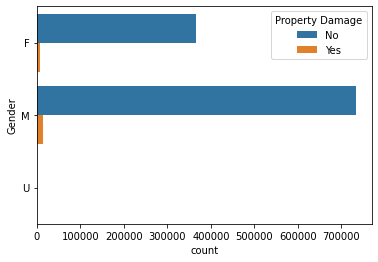

In [465]:
sn.countplot(y='Gender', hue='Property Damage', data = Traffic_Violations_2)

In [466]:
len(pd.unique(Traffic_Violations_2['Make']))

3299

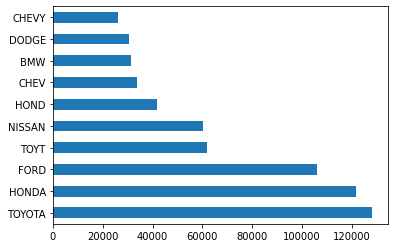

In [467]:
Traffic_Violations_2['Make'].value_counts()[:10].plot(kind='barh')

In [468]:
len(pd.unique(Traffic_Violations_2['Color']))

26

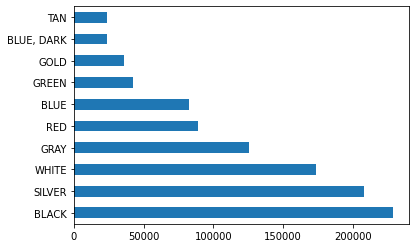

In [469]:
Traffic_Violations_2['Color'].value_counts()[:10].plot(kind='barh')

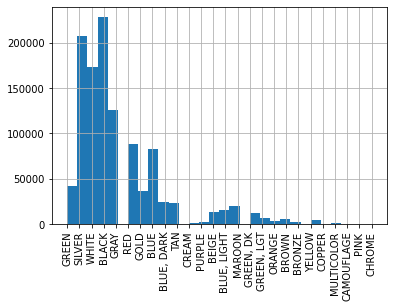

In [470]:
hist = Traffic_Violations_2['Color'].hist(bins=30 , xrot=90)


In [471]:
len(pd.unique(Traffic_Violations_2['Model']))

16125

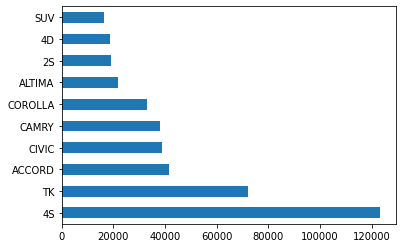

In [472]:
Traffic_Violations_2['Model'].value_counts()[:10].plot(kind='barh')

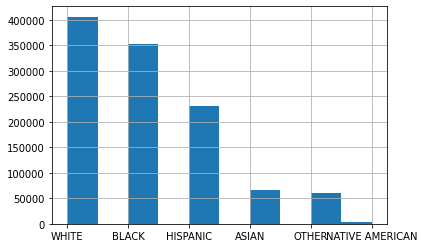

In [473]:
hist = Traffic_Violations_2['Race'].hist()

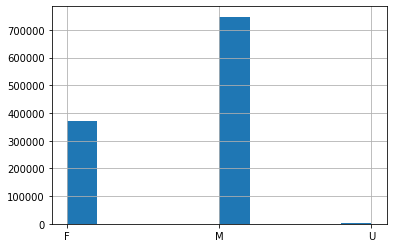

In [474]:
hist = Traffic_Violations_2['Gender'].hist()

In [475]:
Traffic_Violations_2.Description.unique()

array(['DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS',
       'FAILURE STOP AND YIELD AT THRU HWY',
       'FAILURE YIELD RIGHT OF WAY ON U TURN', ...,
       'riding without helmet',
       'driver using hands to use handheld telephone while vehicle is in motion',
       'tail lights inoperative'], dtype=object)

In [476]:
len(pd.unique(Traffic_Violations_2['Description']))

11653

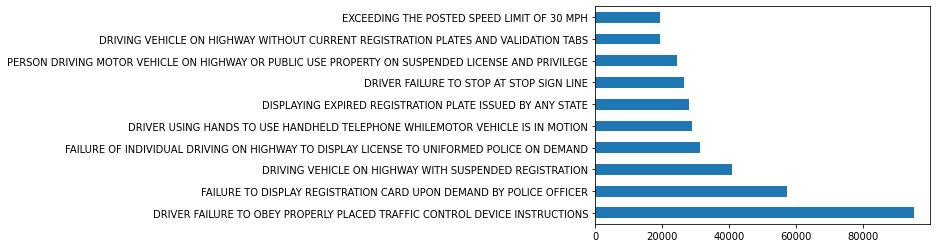

In [477]:
Traffic_Violations_2['Description'].value_counts()[:10].plot(kind='barh')

In [478]:
Traffic_Violations_2.Location.unique()


array(['WISCONSIN AVE@ ELM ST', 'CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE',
       'CHERRY HILL RD./CALVERTON BLVD.', ...,
       'SEVEN LOCKS ROAD/ MONTROSE ROAD',
       'WOODFIELD ROAD HADLEY FARMS DRIVE', '370 AT SHADY GROVE ROAD'],
      dtype=object)

In [479]:
len(pd.unique(Traffic_Violations_2['Location']))

167471

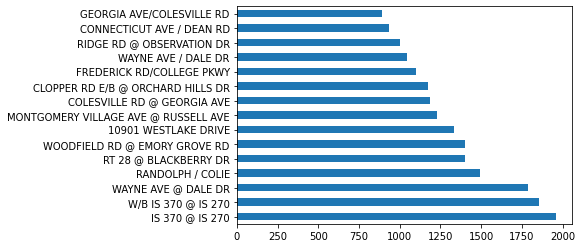

In [480]:
Traffic_Violations_2['Location'].value_counts()[:15].plot(kind='barh')

In [481]:
len(pd.unique(Traffic_Violations_2['Driver City']))

6870

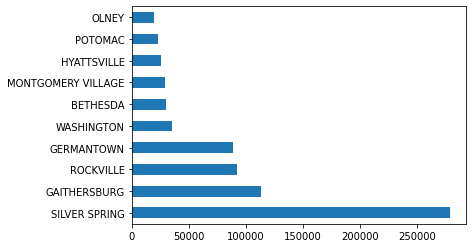

In [482]:
Traffic_Violations_2['Driver City'].value_counts()[:10].plot(kind='barh')

In [483]:
len(pd.unique(Traffic_Violations_2['Driver State']))

67

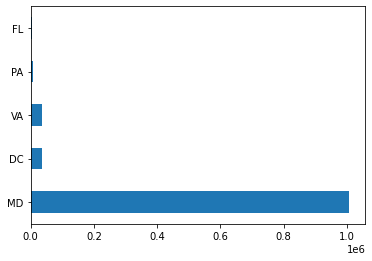

In [484]:
Traffic_Violations_2['Driver State'].value_counts()[:5].plot(kind='barh')

In [485]:
len(pd.unique(Traffic_Violations_2['DL State']))

70

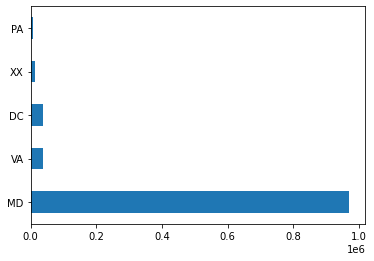

In [486]:
Traffic_Violations_2['DL State'].value_counts()[:5].plot(kind='barh')

In [487]:
len(pd.unique(Traffic_Violations_2['Arrest Type']))

19

In [488]:
Traffic_Violations_2['Arrest Type'].unique()

array(['A - Marked Patrol', 'Q - Marked Laser', 'B - Unmarked Patrol',
       'M - Marked (Off-Duty)', 'E - Marked Stationary Radar',
       'L - Motorcycle', 'R - Unmarked Laser', 'O - Foot Patrol',
       'S - License Plate Recognition', 'D - Unmarked VASCAR',
       'I - Marked Moving Radar (Moving)',
       'H - Unmarked Moving Radar (Stationary)',
       'G - Marked Moving Radar (Stationary)',
       'F - Unmarked Stationary Radar', 'P - Mounted Patrol',
       'C - Marked VASCAR', 'J - Unmarked Moving Radar (Moving)',
       'N - Unmarked (Off-Duty)', 'K - Aircraft Assist'], dtype=object)

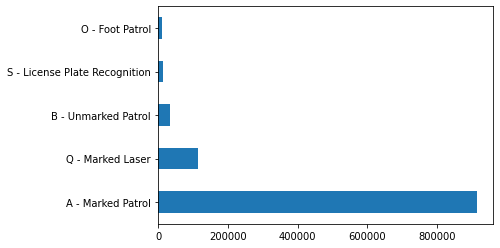

In [489]:
Traffic_Violations_2['Arrest Type'].value_counts()[:5].plot(kind='barh')

In [490]:
Time_Of_Stop = Traffic_Violations_2['Time Of Stop']

In [491]:
type(Time_Of_Stop)

pandas.core.series.Series

In [492]:
Time_Of_Stop

1          10:19:00
2          12:52:00
3          09:22:00
6          13:23:00
10         20:10:00
             ...   
1291736    09:40:00
1291737    09:51:00
1291738    10:21:00
1291739    10:34:00
1291740    12:57:00
Name: Time Of Stop, Length: 1120327, dtype: object

In [493]:
Time_Of_Stop = pd.to_datetime(Time_Of_Stop)
  

In [494]:
type(Time_Of_Stop)

pandas.core.series.Series

In [495]:
Time_Of_Stop

1         2021-09-27 10:19:00
2         2021-09-27 12:52:00
3         2021-09-27 09:22:00
6         2021-09-27 13:23:00
10        2021-09-27 20:10:00
                  ...        
1291736   2021-09-27 09:40:00
1291737   2021-09-27 09:51:00
1291738   2021-09-27 10:21:00
1291739   2021-09-27 10:34:00
1291740   2021-09-27 12:57:00
Name: Time Of Stop, Length: 1120327, dtype: datetime64[ns]

In [496]:
Time_Of_Stop = Time_Of_Stop.apply(lambda x: x.hour)

In [497]:
Time_Of_Stop.unique()

array([10, 12,  9, 13, 20, 16, 21,  0, 23, 17,  8, 11,  1, 14, 22,  5, 19,
        2, 18, 15,  3,  7,  6,  4])

In [498]:
len(Time_Of_Stop.unique())

24

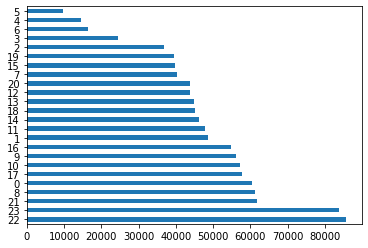

In [499]:
Time_Of_Stop.value_counts().plot(kind='barh')

**From Here I started work for the second part of the homework**

**Homework 4**

In [500]:
Traffic_Violations_2['Violation Type'].unique()

array(['Citation', 'Warning', 'SERO'], dtype=object)

In [501]:
len(pd.unique(Traffic_Violations_2['Violation Type']))

3

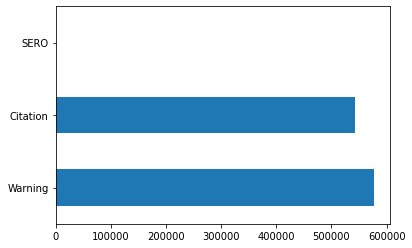

In [502]:
Traffic_Violations_2['Violation Type'].value_counts()[:5].plot(kind='barh')

In [503]:
Violation_Type_table = Traffic_Violations_2['Violation Type']

In [504]:
Violation_Type_table

1          Citation
2          Citation
3          Citation
6          Citation
10         Citation
             ...   
1291736     Warning
1291737     Warning
1291738     Warning
1291739     Warning
1291740     Warning
Name: Violation Type, Length: 1120327, dtype: object

In [505]:
Violation_Type_table_2 = pd.get_dummies(Violation_Type_table)


In [506]:
Violation_Type_table_2

,Citation,SERO,Warning
1,1,0,0
2,1,0,0
3,1,0,0
6,1,0,0
10,1,0,0
...,...,...,...
1291736,0,0,1
1291737,0,0,1
1291738,0,0,1
1291739,0,0,1


In [507]:
sum(Violation_Type_table_2.Citation)

542482

In [508]:
sum(Violation_Type_table_2.Warning)

577822

In [509]:
sum(Violation_Type_table_2.SERO)

23

In [510]:
P_Citation = 542482/1120327
N_Warning = 577822/1120327
P_Citation

0.4842175543390457

In [511]:
N_Warning

0.5157619159406137

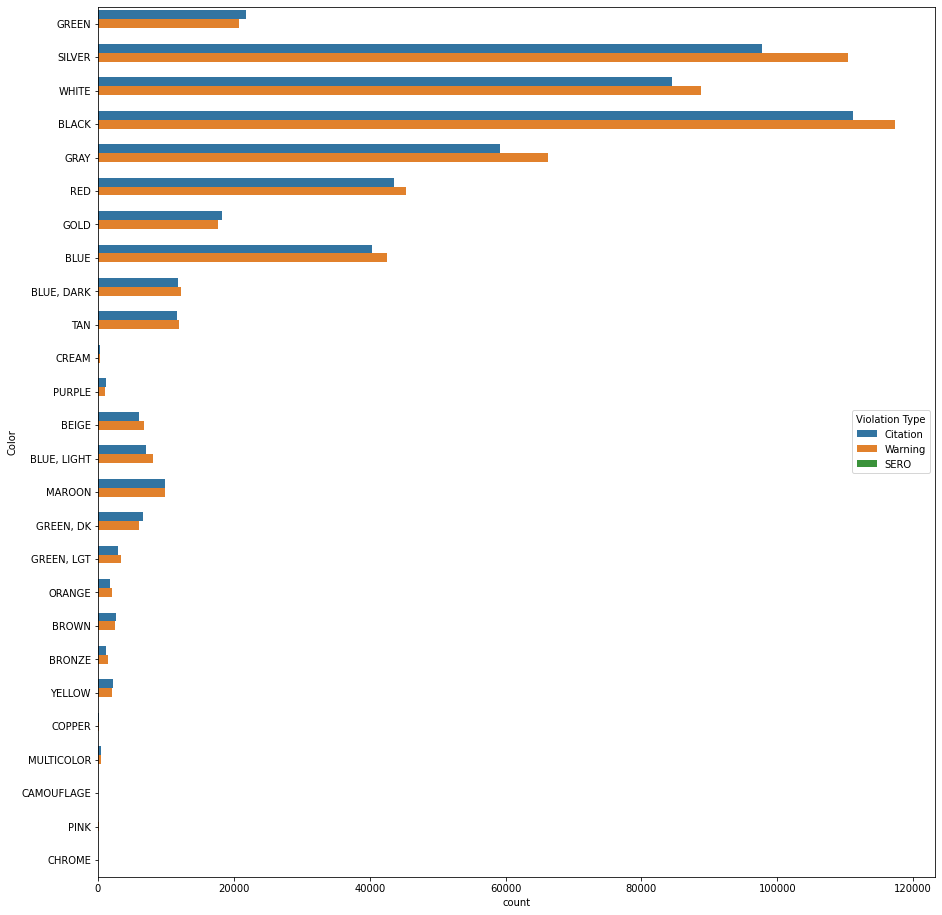

In [512]:
plt.figure(figsize=(15,16))
sn.countplot(y='Color', hue='Violation Type', data = Traffic_Violations_2)
plt.legend(loc='center right', title='Violation Type')

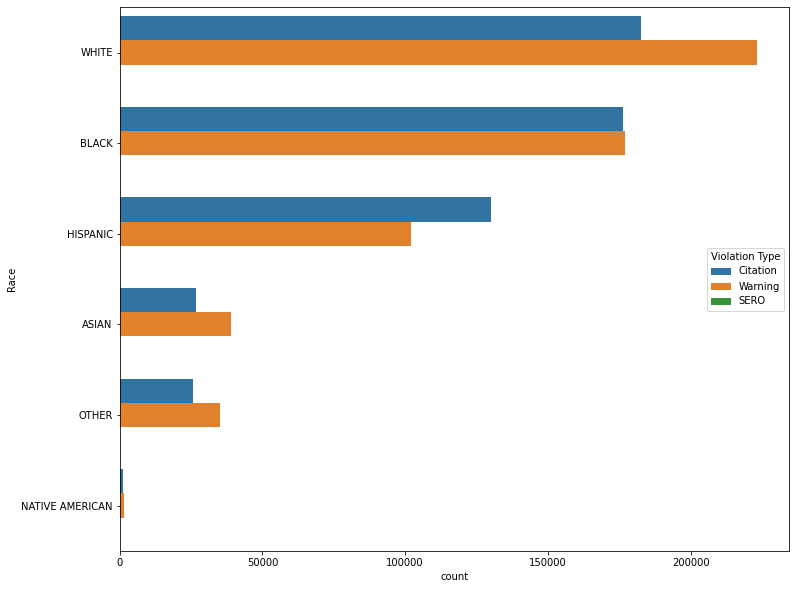

In [513]:
plt.figure(figsize=(12,10))
sn.countplot(y='Race', hue='Violation Type', data = Traffic_Violations_2)
plt.legend(loc='center right', title='Violation Type')

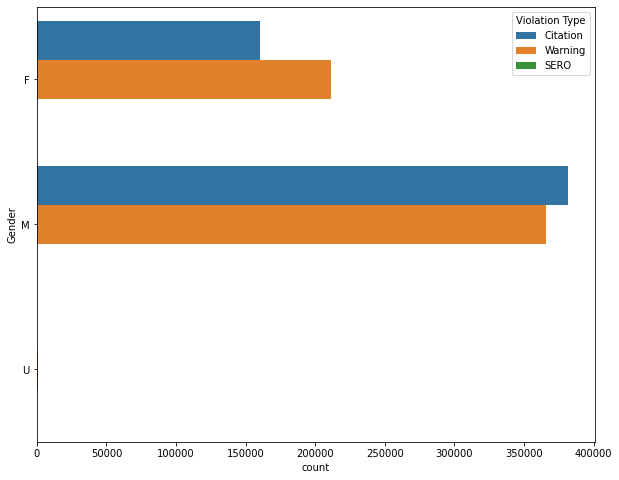

In [514]:
plt.figure(figsize=(10,8))
sn.countplot(y='Gender', hue='Violation Type', data = Traffic_Violations_2)
plt.legend(loc='upper right', title='Violation Type')

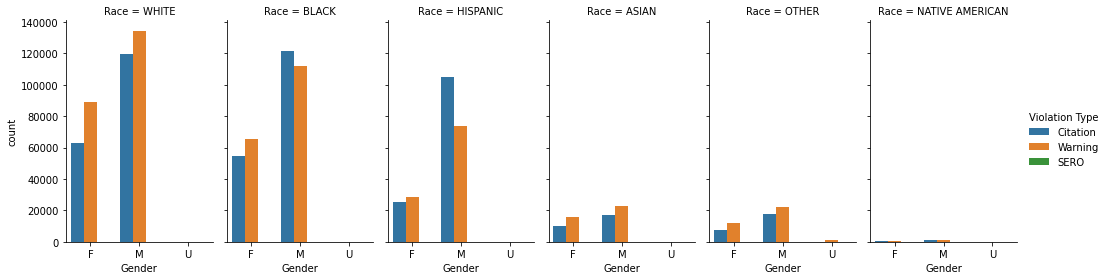

In [515]:
# plt.figure(figsize=(12,12))
sn.catplot(x="Gender", hue="Violation Type", col="Race",
                data=Traffic_Violations_2, kind="count" , height=4, aspect=.6);

In [516]:
Traffic_Violations_2['Violation Type']=Traffic_Violations_2['Violation Type'].replace(to_replace='Citation',value='1')
Traffic_Violations_2['Violation Type']=Traffic_Violations_2['Violation Type'].replace(to_replace='Warning',value='0')
Traffic_Violations_2['Violation Type']=Traffic_Violations_2['Violation Type'].replace(to_replace='SERO',value='2')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [517]:
Traffic_Violations_2['SubAgency'].unique()

array(['2nd district, Bethesda',
       '6th district, Gaithersburg / Montgomery Village',
       '3rd district, Silver Spring', '4th district, Wheaton',
       '1st district, Rockville', '5th district, Germantown',
       'Headquarters and Special Operations'], dtype=object)

In [518]:
Traffic_Violations_2['Belts']=Traffic_Violations_2['Belts'].replace(to_replace='Yes',value='1')
Traffic_Violations_2['Belts']=Traffic_Violations_2['Belts'].replace(to_replace='No',value='0')

Traffic_Violations_2['Personal Injury']=Traffic_Violations_2['Personal Injury'].replace(to_replace='Yes',value='1')
Traffic_Violations_2['Personal Injury']=Traffic_Violations_2['Personal Injury'].replace(to_replace='No',value='0')

Traffic_Violations_2['Property Damage']=Traffic_Violations_2['Property Damage'].replace(to_replace='Yes',value='1')
Traffic_Violations_2['Property Damage']=Traffic_Violations_2['Property Damage'].replace(to_replace='No',value='0')

Traffic_Violations_2['Fatal']=Traffic_Violations_2['Fatal'].replace(to_replace='Yes',value='1')
Traffic_Violations_2['Fatal']=Traffic_Violations_2['Fatal'].replace(to_replace='No',value='0')

Traffic_Violations_2['Commercial License']=Traffic_Violations_2['Commercial License'].replace(to_replace='Yes',value='1')
Traffic_Violations_2['Commercial License']=Traffic_Violations_2['Commercial License'].replace(to_replace='No',value='0')

Traffic_Violations_2['HAZMAT']=Traffic_Violations_2['HAZMAT'].replace(to_replace='Yes',value='1')
Traffic_Violations_2['HAZMAT']=Traffic_Violations_2['HAZMAT'].replace(to_replace='No',value='0')

Traffic_Violations_2['Commercial Vehicle']=Traffic_Violations_2['Commercial Vehicle'].replace(to_replace='Yes',value='1')
Traffic_Violations_2['Commercial Vehicle']=Traffic_Violations_2['Commercial Vehicle'].replace(to_replace='No',value='0')

Traffic_Violations_2['Alcohol']=Traffic_Violations_2['Alcohol'].replace(to_replace='Yes',value='1')
Traffic_Violations_2['Alcohol']=Traffic_Violations_2['Alcohol'].replace(to_replace='No',value='0')

Traffic_Violations_2['Work Zone']=Traffic_Violations_2['Work Zone'].replace(to_replace='Yes',value='1')
Traffic_Violations_2['Work Zone']=Traffic_Violations_2['Work Zone'].replace(to_replace='No',value='0')

Traffic_Violations_2['Contributed To Accident']=Traffic_Violations_2['Contributed To Accident'].replace(to_replace='Yes',value='1')
Traffic_Violations_2['Contributed To Accident']=Traffic_Violations_2['Contributed To Accident'].replace(to_replace='No',value='0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [519]:
Traffic_Violations_2['Belts'] = Traffic_Violations_2['Belts'].astype(int)
Traffic_Violations_2['Personal Injury'] = Traffic_Violations_2['Personal Injury'].astype(int)
Traffic_Violations_2['Property Damage'] = Traffic_Violations_2['Property Damage'].astype(int)
Traffic_Violations_2['Fatal'] = Traffic_Violations_2['Fatal'].astype(int)
Traffic_Violations_2['Commercial License'] = Traffic_Violations_2['Commercial License'].astype(int)
Traffic_Violations_2['HAZMAT'] = Traffic_Violations_2['HAZMAT'].astype(int)
Traffic_Violations_2['Commercial Vehicle'] = Traffic_Violations_2['Commercial Vehicle'].astype(int)
Traffic_Violations_2['Alcohol'] = Traffic_Violations_2['Alcohol'].astype(int)
Traffic_Violations_2['Work Zone'] = Traffic_Violations_2['Work Zone'].astype(int)
Traffic_Violations_2['Contributed To Accident'] = Traffic_Violations_2['Contributed To Accident'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [520]:
Traffic_Violations_2['Violation Type'] 

1          1
2          1
3          1
6          1
10         1
          ..
1291736    0
1291737    0
1291738    0
1291739    0
1291740    0
Name: Violation Type, Length: 1120327, dtype: object

In [521]:
Traffic_Violations_2.head(5)

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,0,0,0,0,0,0,0,0,0,VA,02 - Automobile,2001,TOYOTA,COROLLA,GREEN,1,21-201(a1),Transportation Article,0,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,0,0,1,0,0,0,0,0,0,MD,02 - Automobile,2001,HONDA,ACCORD,SILVER,1,21-403(b),Transportation Article,0,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,0,0,1,0,0,0,0,0,0,MD,02 - Automobile,1998,DODG,DAKOTA,WHITE,1,21-402(b),Transportation Article,0,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
6,10/08/2013,13:23:00,MCP,"4th district, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GEORGIA AVE / BEL PRE RD,39.093383,-77.079552,No,0,0,0,0,0,0,0,0,0,MD,02 - Automobile,1993,FORD,PICKUP,BLACK,1,13-401(h),Transportation Article,0,HISPANIC,M,BELTSVILLE,MD,MD,A - Marked Patrol,"(39.0933833333333, -77.0795516666667)"
10,02/14/2014,20:10:00,MCP,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,No,0,0,0,0,0,0,0,0,0,MD,02 - Automobile,2005,CADI,STS,BLACK,1,21-311(1),Transportation Article,0,WHITE,M,POINT OF ROCK,MD,WV,A - Marked Patrol,"(39.2348434333333, -77.28153995)"


In [522]:
Traffic_Violations_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120327 entries, 1 to 1291740
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1120327 non-null  object 
 1   Time Of Stop             1120327 non-null  object 
 2   Agency                   1120327 non-null  object 
 3   SubAgency                1120327 non-null  object 
 4   Description              1120327 non-null  object 
 5   Location                 1120327 non-null  object 
 6   Latitude                 1120327 non-null  float64
 7   Longitude                1120327 non-null  float64
 8   Accident                 1120327 non-null  object 
 9   Belts                    1120327 non-null  int64  
 10  Personal Injury          1120327 non-null  int64  
 11  Property Damage          1120327 non-null  int64  
 12  Fatal                    1120327 non-null  int64  
 13  Commercial License       1120327 non-null 

In [523]:
Traffic_Violations_2['Violation Type'] = Traffic_Violations_2['Violation Type'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [524]:
Traffic_Violations_3 = Traffic_Violations_2.drop(columns= [ 'Date Of Stop', 'Time Of Stop', 'Charge','Article',
                                        'Accident', 'Agency', 'Latitude', 'Make', 'Model', 'Color', 'Race', 'Year',
                                        'Longitude', 'SubAgency', 'Description', 'Location', 'State', 'VehicleType',
                                        'Gender', 'Driver City', 'Driver State', 'DL State','Arrest Type','Geolocation'])

In [525]:
Traffic_Violations_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120327 entries, 1 to 1291740
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype
---  ------                   --------------    -----
 0   Belts                    1120327 non-null  int64
 1   Personal Injury          1120327 non-null  int64
 2   Property Damage          1120327 non-null  int64
 3   Fatal                    1120327 non-null  int64
 4   Commercial License       1120327 non-null  int64
 5   HAZMAT                   1120327 non-null  int64
 6   Commercial Vehicle       1120327 non-null  int64
 7   Alcohol                  1120327 non-null  int64
 8   Work Zone                1120327 non-null  int64
 9   Violation Type           1120327 non-null  int64
 10  Contributed To Accident  1120327 non-null  int64
dtypes: int64(11)
memory usage: 102.6 MB


In [526]:
list(Traffic_Violations_3.columns)

['Belts',
 'Personal Injury',
 'Property Damage',
 'Fatal',
 'Commercial License',
 'HAZMAT',
 'Commercial Vehicle',
 'Alcohol',
 'Work Zone',
 'Violation Type',
 'Contributed To Accident']

In [527]:
corr_matrix = Traffic_Violations_3.corr()

In [528]:
corr_matrix

,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Violation Type,Contributed To Accident
Belts,1.000000,0.103277,0.077954,0.000503,-0.003303,0.002793,-0.009632,-0.001302,0.001977,0.049298,0.074945
Personal Injury,0.103277,1.000000,-0.015114,-0.001414,0.003801,-0.001031,0.000638,0.010566,0.004213,0.098715,0.346391
Property Damage,0.077954,-0.015114,1.000000,-0.001794,0.011855,0.000778,-0.002943,0.019645,0.002601,0.120633,0.367123
Fatal,0.000503,-0.001414,-0.001794,1.000000,-0.001830,-0.000122,-0.000909,-0.000529,-0.000186,0.002890,0.013343
Commercial License,-0.003303,0.003801,0.011855,-0.001830,1.000000,0.017499,0.107632,-0.004714,0.000862,0.018328,0.010648
HAZMAT,0.002793,-0.001031,0.000778,-0.000122,0.017499,1.000000,0.029106,-0.000386,-0.000135,-0.004239,-0.000856
Commercial Vehicle,-0.009632,0.000638,-0.002943,-0.000909,0.107632,0.029106,1.000000,-0.000043,0.000779,-0.024020,-0.003330
Alcohol,-0.001302,0.010566,0.019645,-0.000529,-0.004714,-0.000386,-0.000043,1.000000,0.002471,0.037319,0.012003
Work Zone,0.001977,0.004213,0.002601,-0.000186,0.000862,-0.000135,0.000779,0.002471,1.000000,0.004939,-0.001421
Violation Type,0.049298,0.098715,0.120633,0.002890,0.018328,-0.004239,-0.024020,0.037319,0.004939,1.000000,0.137576


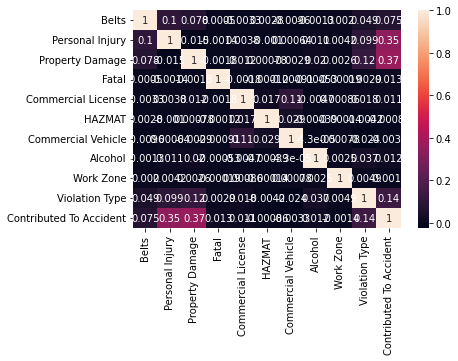

In [529]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [530]:
from sklearn.model_selection import train_test_split

In [531]:
X_1 = Traffic_Violations_3.drop(columns= ['Violation Type'])


y_1 = Traffic_Violations_3['Violation Type']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=1)

In [532]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train_1,y_train_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [533]:
clf.score(X_test_1,y_test_1)

0.554912391884534

In [534]:
# the tree code from https://gist.github.com/HemanthDavuluri

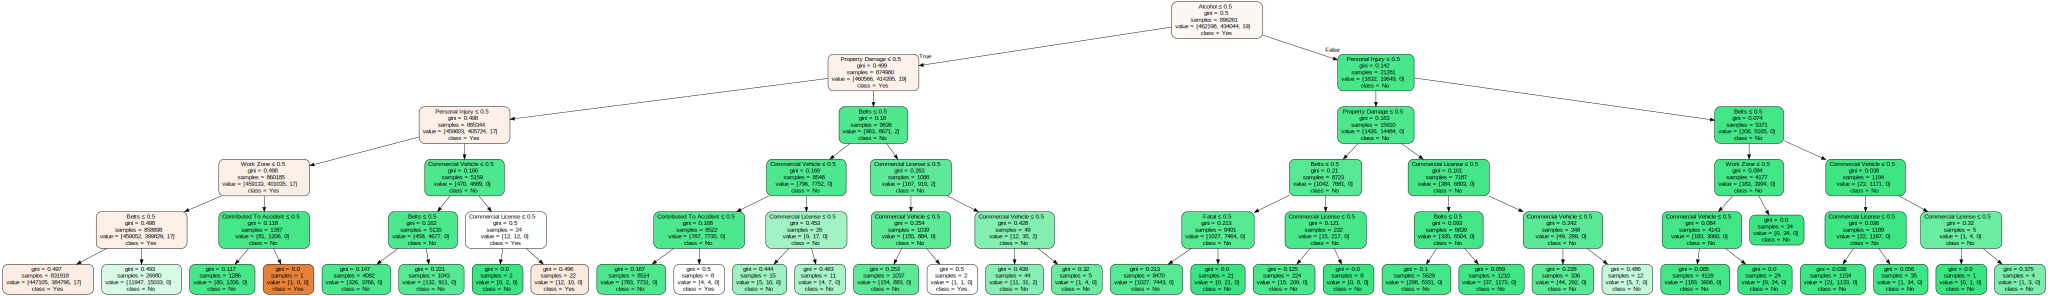

In [535]:
import graphviz 
tree_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=['Belts','Personal Injury','Property Damage','Fatal',
                                              'Commercial License','HAZMAT','Commercial Vehicle',
                                              'Work Zone','Contributed To Accident','Alcohol'],
                               class_names=['Yes','No'],filled=True,
                                rounded=True,  
                              special_characters=True) 
graph = graphviz.Source(tree_data)
graph.render("Gini")
graph

****Try with get_dummies****

In [536]:
Traffic_Violations_4 = Traffic_Violations.drop(columns= [ 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description', 'Location',
                                                         'Latitude', 'Longitude', 'Accident', 'Year', 'State', 'Make', 'Model',
                                                         'Charge','Article', 'Driver City', 'Driver State', 'DL State','Arrest Type','Geolocation'])

In [537]:
Traffic_Violations_4 = Traffic_Violations_4.dropna()

In [538]:
Traffic_Violations_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276272 entries, 0 to 1292398
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Belts                    1276272 non-null  object
 1   Personal Injury          1276272 non-null  object
 2   Property Damage          1276272 non-null  object
 3   Fatal                    1276272 non-null  object
 4   Commercial License       1276272 non-null  object
 5   HAZMAT                   1276272 non-null  object
 6   Commercial Vehicle       1276272 non-null  object
 7   Alcohol                  1276272 non-null  object
 8   Work Zone                1276272 non-null  object
 9   VehicleType              1276272 non-null  object
 10  Color                    1276272 non-null  object
 11  Violation Type           1276272 non-null  object
 12  Contributed To Accident  1276272 non-null  object
 13  Race                     1276272 non-null  object
 14  Ge

In [539]:
Traffic_Violations_4 = pd.get_dummies(Traffic_Violations_4, columns=['Belts',
 'Personal Injury',
 'Property Damage',
 'Fatal',
 'Commercial License',
 'HAZMAT',
 'Commercial Vehicle',
 'Alcohol',
 'Work Zone',
 'VehicleType',
 'Color',
 
 'Contributed To Accident',
 'Race',
 'Gender'])

In [540]:
corr_matrix_2 = Traffic_Violations_4.corr()

In [541]:
corr_matrix_2

,Belts_No,Belts_Yes,Personal Injury_No,Personal Injury_Yes,Property Damage_No,Property Damage_Yes,Fatal_No,Fatal_Yes,Commercial License_No,Commercial License_Yes,HAZMAT_No,HAZMAT_Yes,Commercial Vehicle_No,Commercial Vehicle_Yes,Alcohol_No,Alcohol_Yes,Work Zone_No,Work Zone_Yes,VehicleType_01 - Motorcycle,VehicleType_02 - Automobile,VehicleType_03 - Station Wagon,VehicleType_04 - Limousine,VehicleType_05 - Light Duty Truck,VehicleType_06 - Heavy Duty Truck,VehicleType_07 - Truck/Road Tractor,VehicleType_08 - Recreational Vehicle,VehicleType_09 - Farm Vehicle,VehicleType_10 - Transit Bus,VehicleType_11 - Cross Country Bus,VehicleType_12 - School Bus,VehicleType_13 - Ambulance,VehicleType_13 - Ambulance(Emerg),VehicleType_14 - Ambulance(Non-Emerg),VehicleType_15 - Fire Vehicle,VehicleType_15 - Fire(Emerg),VehicleType_16 - Fire(Non-Emerg),VehicleType_17 - Police(Emerg),VehicleType_18 - Police Vehicle,VehicleType_18 - Police(Non-Emerg),VehicleType_19 - Moped,...,VehicleType_27 - Farm Equipment,VehicleType_28 - Other,VehicleType_29 - Unknown,Color_BEIGE,Color_BLACK,Color_BLUE,"Color_BLUE, DARK","Color_BLUE, LIGHT",Color_BRONZE,Color_BROWN,Color_CAMOUFLAGE,Color_CHROME,Color_COPPER,Color_CREAM,Color_GOLD,Color_GRAY,Color_GREEN,"Color_GREEN, DK","Color_GREEN, LGT",Color_MAROON,Color_MULTICOLOR,Color_ORANGE,Color_PINK,Color_PURPLE,Color_RED,Color_SILVER,Color_TAN,Color_WHITE,Color_YELLOW,Contributed To Accident_No,Contributed To Accident_Yes,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_NATIVE AMERICAN,Race_OTHER,Race_WHITE,Gender_F,Gender_M,Gender_U
Belts_No,1.000000,-1.000000,0.101729,-0.101729,0.079066,-0.079066,0.000120,-0.000120,-0.003363,0.003363,0.002024,-0.002024,-0.009909,0.009909,0.000283,-0.000283,0.001679,-0.001679,0.007375,0.021589,0.006016,-0.003036,-0.007579,0.008377,-0.001584,0.000687,0.001642,-0.004644,-0.000716,-0.004675,0.000168,0.000604,-0.000904,0.000290,-0.008287,0.000335,0.000335,0.000335,0.000556,0.005525,...,-0.001323,-0.058284,0.002534,0.011867,-0.001603,-0.006718,0.003164,0.001267,0.001478,-0.001288,0.000821,0.000871,0.002221,0.001502,-0.004601,-0.021653,0.000358,0.004513,0.002564,0.006450,0.003539,0.001374,0.000886,0.000904,-0.001195,0.012842,-0.000503,0.004437,0.000571,0.071367,-0.071367,-0.002360,0.012830,-0.001440,0.002769,-0.007098,-0.006980,-0.011876,0.011505,0.005066
Belts_Yes,-1.000000,1.000000,-0.101729,0.101729,-0.079066,0.079066,-0.000120,0.000120,0.003363,-0.003363,-0.002024,0.002024,0.009909,-0.009909,-0.000283,0.000283,-0.001679,0.001679,-0.007375,-0.021589,-0.006016,0.003036,0.007579,-0.008377,0.001584,-0.000687,-0.001642,0.004644,0.000716,0.004675,-0.000168,-0.000604,0.000904,-0.000290,0.008287,-0.000335,-0.000335,-0.000335,-0.000556,-0.005525,...,0.001323,0.058284,-0.002534,-0.011867,0.001603,0.006718,-0.003164,-0.001267,-0.001478,0.001288,-0.000821,-0.000871,-0.002221,-0.001502,0.004601,0.021653,-0.000358,-0.004513,-0.002564,-0.006450,-0.003539,-0.001374,-0.000886,-0.000904,0.001195,-0.012842,0.000503,-0.004437,-0.000571,-0.071367,0.071367,0.002360,-0.012830,0.001440,-0.002769,0.007098,0.006980,0.011876,-0.011505,-0.005066
Personal Injury_No,0.101729,-0.101729,1.000000,-1.000000,-0.015286,0.015286,-0.001599,0.001599,0.003319,-0.003319,-0.001074,0.001074,-0.000361,0.000361,0.012023,-0.012023,0.003740,-0.003740,-0.009597,0.010786,0.004380,-0.004774,-0.001707,-0.002470,-0.010649,-0.003010,0.000942,-0.015030,-0.000400,-0.006043,0.000096,0.000346,-0.012119,0.000166,-0.003475,0.000192,0.000192,0.000192,0.000319,-0.003397,...,-0.005795,-0.010421,-0.000050,0.000085,0.003292,-0.002247,-0.003000,-0.000660,0.001748,-0.000413,0.000471,0.000499,0.001955,0.001355,0.000893,0.000241,0.003281,-0.002803,0.002756,-0.006562,-0.013976,0.003417,0.001318,-0.004209,-0.002995,0.006056,-0.003620,-0.001575,-0.006036,0.339571,-0.339571,0.000396,0.015300,-0.013342,-0.001082,0.003486,-0.005172,0.001863,-0.002027,0.002329
Personal Injury_Yes,-0.101729,0.101729,-1.000000,1.000000,0.015286,-0.015286,0.001599,-0.001599,-0.003319,

In [542]:
X_2 = Traffic_Violations_4.drop(columns= ['Violation Type'])


y_2 = Traffic_Violations_4['Violation Type']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=1)

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train_2,y_train_2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [543]:
clf.score(X_train_2,y_train_2)

0.5367902787123036